# Graphviz

We include code for converting composite bloqs to graphs, drawn with graphviz.

In [1]:
from qualtran.drawing import GraphDrawer, PrettyGraphDrawer
from qualtran.drawing.graphviz_test import Atom, TestParallelBloq

from IPython.display import SVG

def show_bloq(bloq, draw_cls=PrettyGraphDrawer):
    display(SVG(draw_cls(bloq).get_graph().create_svg()))

Each constituent bloq is a table whose header contains the bloq name. Each row is a register. Edges represent connections between soquets. Each edge is labeled with the bitsize of the connected registers. Dangling soquets (corresponding to the enclosing bloq's registers) are drawn as plain text.

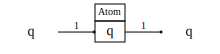

In [2]:
show_bloq(Atom())

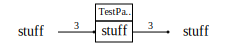

In [3]:
show_bloq(TestParallelBloq())

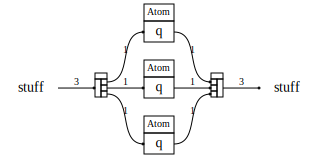

In [4]:
show_bloq(TestParallelBloq().decompose_bloq())

### `GraphDrawer`

The `PrettyGraphDrawer` abbreviates names, hides some details of reshaping bloqs, and chooses drawing parameters to give a compact visualization of the bloq. `GraphDrawer` does not add any styling information and relies on graphviz defaults.

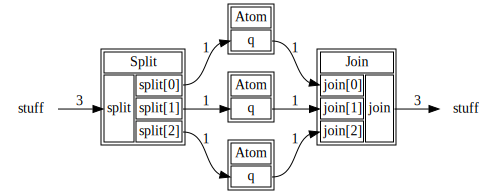

In [5]:
show_bloq(TestParallelBloq().decompose_bloq(), draw_cls=GraphDrawer)

### `pydot`

We use `pydot` to manupulate graphviz graphs. You can get that graph directly:

In [6]:
graph = GraphDrawer(TestParallelBloq().decompose_bloq()).get_graph()
print(graph.to_string())

digraph my_graph {
rankdir=LR;
subgraph  {
rank=same;
stuff [label=stuff, shape=plaintext];
}

Atom [label=<<TABLE >
  <TR><TD colspan="2">Atom</TD></TR>
  <TR><TD colspan="2" port="q_G5">q</TD></TR>
</TABLE>>, shape=plain];
Split [label=<<TABLE >
  <TR><TD colspan="2">Split</TD></TR>
  <TR><TD rowspan="3" port="split_G12">split</TD><TD  port="split_G10">split[0]</TD></TR>
  <TR><TD  port="split_G15">split[1]</TD></TR>
  <TR><TD  port="split_G11">split[2]</TD></TR>
</TABLE>>, shape=plain];
Atom_G0 [label=<<TABLE >
  <TR><TD colspan="2">Atom</TD></TR>
  <TR><TD colspan="2" port="q_G13">q</TD></TR>
</TABLE>>, shape=plain];
Atom_G2 [label=<<TABLE >
  <TR><TD colspan="2">Atom</TD></TR>
  <TR><TD colspan="2" port="q_G7">q</TD></TR>
</TABLE>>, shape=plain];
Join [label=<<TABLE >
  <TR><TD colspan="2">Join</TD></TR>
  <TR><TD  port="join_G8">join[0]</TD><TD rowspan="3" port="join_G4">join</TD></TR>
  <TR><TD  port="join_G6">join[1]</TD></TR>
  <TR><TD  port="join_G9">join[2]</TD></TR>
</TABLE

## Register Groups

We group left and right registers with shared names. This section shows some usual and unusual register specifications to test the graphviz logic for making the table rows match up.

In [7]:
from qualtran import Bloq, Register, Signature, Side

class SignatureBloq(Bloq):
    """Placeholder bloq that lets you specify its signature."""
    def __init__(self, signature: Signature):
        self._signature = signature
        
    @property
    def signature(self) -> Signature:
        return self._signature
        
    def short_name(self):
        return 'Bloq'

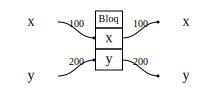

In [8]:
bloq = SignatureBloq(Signature([
    Register('x', 100),
    Register('y', 200),
]))
show_bloq(bloq)

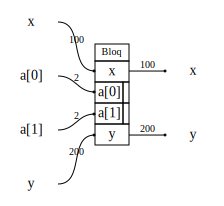

In [9]:
bloq = SignatureBloq(Signature([
    Register('x', 100),
    Register('a', 2, shape=(2,), side=Side.LEFT),
    Register('y', 200),
]))
show_bloq(bloq)

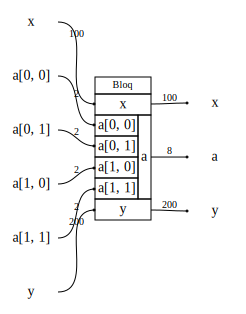

In [10]:
bloq = SignatureBloq(Signature([
    Register('x', 100),
    Register('a', 2, shape=(2,2), side=Side.LEFT),
    Register('a', 8,  side=Side.RIGHT),
    Register('y', 200),
]))
show_bloq(bloq)

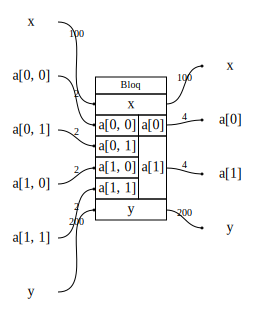

In [11]:
bloq = SignatureBloq(Signature([
    Register('x', 100),
    Register('a', 2, shape=(2,2), side=Side.LEFT),
    Register('a', 4, shape=(2,), side=Side.RIGHT),
    Register('y', 200),
]))
show_bloq(bloq)